In [1]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: fineGrained).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [1]:
!pip install easyocr
!pip install opencv-python
#!pip install matplotlib
#!pip install torch
#!pip install torchvision
#!pip install huggingface_hub
#!pip install transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 20.4 MB/s eta 0:00:00


In [2]:
import cv2
import easyocr
import matplotlib.pyplot as plt

In [3]:
def showImg(img):
  img=cv2.imread(img)
  words=[]
  reader = easyocr.Reader(['es'],gpu=True)#,gpu=False)
  result = reader.readtext(img)
  for r in result:
    print(r)
    bbox,text,score=r
    print(text)
    top_left = tuple(map(int, bbox[0]))
    bottom_right = tuple(map(int, bbox[2]))
    print(top_left)
    print(bottom_right)
    cv2.rectangle(img,top_left,bottom_right,(0,255,0),5)
    cv2.putText(img,text,(int(top_left[0]), int(top_left[1] - 10)),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0),2)
    words.append(text)
  #print(words)
  plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
  plt.show()
  return words

In [8]:

def showImgSobel(img):
  img=cv2.imread(img)
  #img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  #plt.imshow(img)
  #plt.show()
  image= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  sobelx = cv2.Sobel(image,-1,1,0)
  sobely = cv2.Sobel(image,-1,0,1)
  sobelxy = cv2.addWeighted(sobelx, 0.5,sobely, 0.5, 0)
  canny=cv2.Canny(image,100,200)
  canny2=cv2.Canny(image,80,50)
  #todos los distintos sobels
  sobels=[sobelx,sobely,sobelxy,canny,canny2]

  reader = easyocr.Reader(['es'],gpu=True)#,gpu=False)
  for sobel in sobels:
    result = reader.readtext(sobel)
    for r in result:
      print(r)
      bbox,text,score=r
      print(text)
      top_left = tuple(map(int, bbox[0]))
      bottom_right = tuple(map(int, bbox[2]))
      print(top_left)
      print(bottom_right)
      cv2.rectangle(img,top_left,bottom_right,(0,255,0),5)
      cv2.putText(img,text,(int(top_left[0]), int(top_left[1] - 10)),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,255,0),2)

    plt.imshow(cv2.cvtColor(sobel,cv2.COLOR_BGR2RGB))
    plt.show()

([[125, 23], [327, 23], [327, 43], [125, 43]], 'BANCO CENTRIL DE BOLIVIA', 0.7205319798376401)
BANCO CENTRIL DE BOLIVIA
(125, 23)
(327, 43)
([[408, 18], [446, 18], [446, 44], [408, 44]], '20', 0.5771762409594516)
20
(408, 18)
(446, 44)
([[144, 42], [180, 42], [180, 50], [144, 50]], 'ESTADC', 0.21286283103015005)
ESTADC
(144, 42)
(180, 50)
([[194, 40], [250, 40], [250, 48], [194, 48]], 'MAinacioNe', 0.06052091229995448)
MAinacioNe
(194, 40)
(250, 48)
([[272, 38], [308, 38], [308, 46], [272, 46]], 'AouNf', 0.060807334782791364)
AouNf
(272, 38)
(308, 46)
([[75, 141], [171, 141], [171, 209], [75, 209]], '20', 0.9984513704742192)
20
(75, 141)
(171, 209)
([[68, 203], [191, 203], [191, 224], [68, 224]], 'VEINTE BOLIVIANOS', 0.9588676371037542)
VEINTE BOLIVIANOS
(68, 203)
(191, 224)


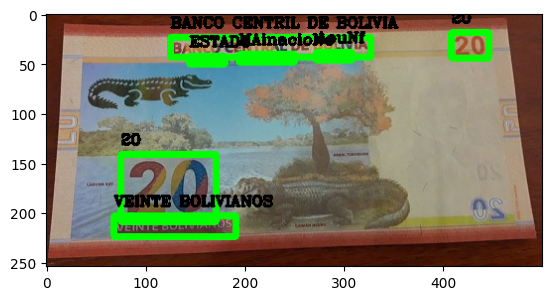

In [18]:
p1='/content/12.47.11(1)_0.jpeg'
p2='/content/IMG_3285.JPG'
p3='/content/IMG_3282.JPG'
p4="/content/IMG_3279.JPG"
p5='/content/IMG_3280.JPG'
detect20=showImg(p1)

In [19]:
detect20

['BANCO CENTRIL DE BOLIVIA',
 '20',
 'ESTADC',
 'MAinacioNe',
 'AouNf',
 '20',
 'VEINTE BOLIVIANOS']

In [20]:
def addBs(lista,n):
  val=0.0
  for item in lista:
    words=item.split(' ')
    for word in words:
      if word=='DIEZ' or word=='10':
        val=10.0
      elif word=='VEINTE'or word=='20':
        val=20.0
      elif word=='CINCUENTA' or word=='50':
        val=50.0
      elif word=='CIEN'or word=='100':
        val=100.0
      elif word=='DOSCIENTOS'or word=='200':
        val=200.0

      if word=='BOLIVIANOS':
        val=val*1
      elif word=='CENTAVOS':
        val=val/100
    print(words)
  print(val)
  return val
total=addBs(detect20,0)

['BANCO', 'CENTRIL', 'DE', 'BOLIVIA']
['20']
['ESTADC']
['MAinacioNe']
['AouNf']
['20']
['VEINTE', 'BOLIVIANOS']
20.0


([[2146, 1172], [2336, 1172], [2336, 1285], [2146, 1285]], 'E<', 0.1352399458855783)
E<
(2146, 1172)
(2336, 1285)
([[2052, 1356], [2448, 1356], [2448, 1601], [2052, 1601]], '50', 0.9996598075896997)
50
(2052, 1356)
(2448, 1601)
([[1886, 1572], [2614, 1572], [2614, 1788], [1886, 1788]], '{CENTIVS)', 0.3364204215984409)
{CENTIVS)
(1886, 1572)
(2614, 1788)
([[2574, 1408], [2746, 1408], [2746, 1940], [2574, 1940]], '6', 0.5853387039333633)
6
(2574, 1408)
(2746, 1940)
([[2021, 2007], [2403, 2007], [2403, 2178], [2021, 2178]], '2 0 5 0', 0.23167911416278344)
2 0 5 0
(2021, 2007)
(2403, 2178)
([[1898.5048425117716, 1225.3077712248592], [2044.395365761747, 1299.1157123126347], [1823.4951574882284, 1726.6922287751408], [1677.604634238253, 1652.8842876873653]], '3', 0.46059756564353904)
3
(1898, 1225)
(1823, 1726)


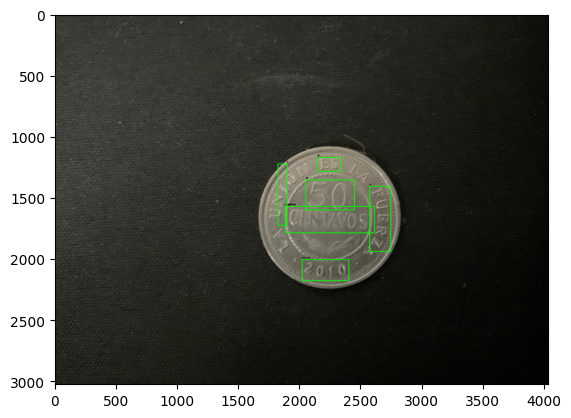

['E<']
['50']
['{CENTIVS)']
['6']
['2', '0', '5', '0']
['3']
50.0


In [21]:
detect50c=showImg(p4)
total=addBs(detect50c,0)

([[1138, 719], [2698, 719], [2698, 940], [1138, 940]], 'BANCO CENTRAL DE BOLIVIA', 0.970106151160216)
BANCO CENTRAL DE BOLIVIA
(1138, 719)
(2698, 940)
([[1266, 857], [2567, 857], [2567, 1016], [1266, 1016]], 'ESTADO PLURINACION L DE BOLIVIA', 0.7210530189328014)
ESTADO PLURINACION L DE BOLIVIA
(1266, 857)
(2567, 1016)
([[3355, 829], [3593, 829], [3593, 1016], [3355, 1016]], '10', 0.9996289593104142)
10
(3355, 829)
(3593, 1016)
([[2324, 1606], [2563, 1606], [2563, 1644], [2324, 1644]], 'PUYA RAIMONDI', 0.9582753877264246)
PUYA RAIMONDI
(2324, 1606)
(2563, 1644)
([[541, 1754], [800, 1754], [800, 1799], [541, 1799]], 'ISLA DEL PESCADO', 0.9498153507074167)
ISLA DEL PESCADO
(541, 1754)
(800, 1799)
([[557, 1786], [792, 1786], [792, 1829], [557, 1829]], 'SALAR DE UYUNI', 0.8509562865874823)
SALAR DE UYUNI
(557, 1786)
(792, 1829)
([[1149, 1703], [1663, 1703], [1663, 2088], [1149, 2088]], '16', 0.5242773949452978)
16
(1149, 1703)
(1663, 2088)
([[1104, 2147], [1890, 2147], [1890, 2255], [1104, 

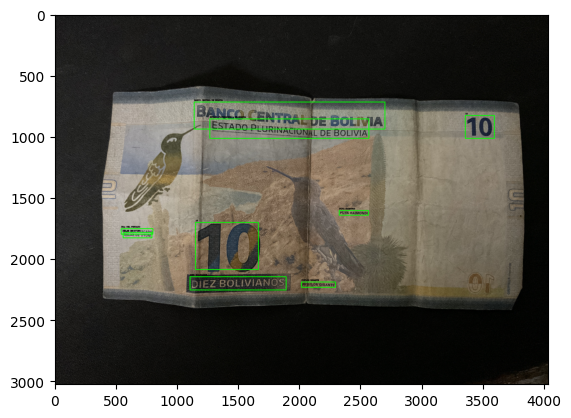

['BANCO', 'CENTRAL', 'DE', 'BOLIVIA']
['ESTADO', 'PLURINACION', 'L', 'DE', 'BOLIVIA']
['10']
['PUYA', 'RAIMONDI']
['ISLA', 'DEL', 'PESCADO']
['SALAR', 'DE', 'UYUNI']
['16']
['DIEZ', 'BOLIVIANOS']
['PUFLOR', 'GIGANTE']
10.0


In [22]:
detect=showImg(p2)
total=addBs(detect,0)

([[2096, 1205], [2250, 1205], [2250, 1302], [2096, 1302]], 'jS', 0.29956187794208133)
jS
(2096, 1205)
(2250, 1302)
([[1967, 1513], [2449, 1513], [2449, 1653], [1967, 1653]], 'BOLIVTANO', 0.6086080173453505)
BOLIVTANO
(1967, 1513)
(2449, 1653)
([[2409, 1328], [2589, 1328], [2589, 1785], [2409, 1785]], '5', 0.19381222472389936)
5
(2409, 1328)
(2589, 1785)
([[2083, 1822], [2364, 1822], [2364, 1937], [2083, 1937]], '2012', 0.9622005224227905)
2012
(2083, 1822)
(2364, 1937)
([[2324.361543263449, 1202.0185441313297], [2489.8532521995467, 1313.2092133870747], [2433.638456736551, 1395.9814558686703], [2268.1467478004533, 1283.7907866129253]], 'LA', 0.6680354498542743)
LA
(2324, 1202)
(2433, 1395)
([[1999.3130405584343, 1188.6209203007431], [2127.797368661243, 1264.4400424730127], [1895.6869594415657, 1642.3790796992569], [1767.202631338757, 1566.5599575269873]], '4', 0.18553792219850962)
4
(1999, 1188)
(1895, 1642)
([[1865.1297206890206, 1675.0344806816604], [1935.5548483636965, 1639.014002398

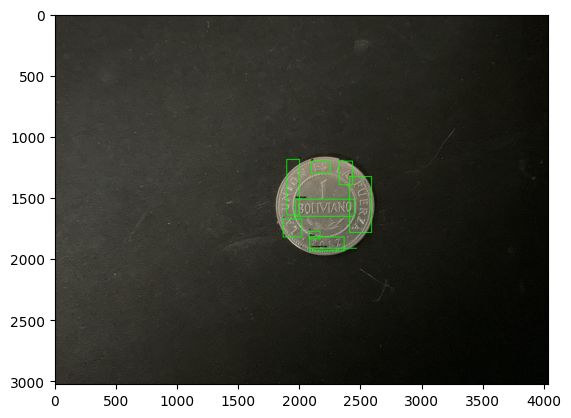

['jS']
['BOLIVTANO']
['5']
['2012']
['LA']
['4']
['~']
['C']
['CcaacceaccCcs?']
0.0


In [23]:
detect=showImg(p3)
total=addBs(detect,0)

([[2101, 1184], [2270, 1184], [2270, 1300], [2101, 1300]], 'Ps', 0.3487173222845199)
Ps
(2101, 1184)
(2270, 1300)
([[2036, 1356], [2373, 1356], [2373, 1598], [2036, 1598]], '20', 0.9994137876755608)
20
(2036, 1356)
(2373, 1598)
([[1856, 1566], [2550, 1566], [2550, 1762], [1856, 1762]], '(CENTAVOS)', 0.2505700719919861)
(CENTAVOS)
(1856, 1566)
(2550, 1762)
([[2492, 1377], [2701, 1377], [2701, 1931], [2492, 1931]], 'P', 0.10510782641723893)
P
(2492, 1377)
(2701, 1931)
([[2379.1913924599376, 1186.0192416586845], [2577.9947773547606, 1310.5786418837663], [2499.8086075400624, 1429.9807583413155], [2302.0052226452394, 1305.4213581162337]], 'LA', 0.4794162804526457)
LA
(2379, 1186)
(2499, 1429)
([[1893.0544113298831, 1210.207609387411], [2044.4989612734284, 1280.80855102396], [1830.9455886701169, 1731.792390612589], [1680.5010387265716, 1662.19144897604]], '9', 0.9498228865811917)
9
(1893, 1210)
(1830, 1731)
([[2128.06817128534, 1992.1249188971215], [2393.01011305046, 1970.5342811187234], [23

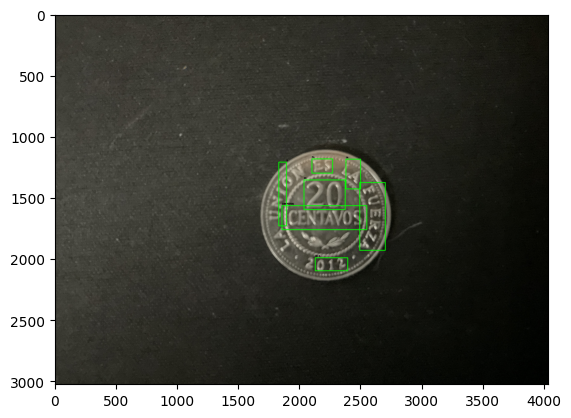

['Ps']
['20']
['(CENTAVOS)']
['P']
['LA']
['9']
['09', '2']
20.0


In [24]:
detect=showImg(p5)
total=addBs(detect,0)

In [2]:
!pip install -U bitsandbytes accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 16.2 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.33.0
    Uninstalling accelerate-0.33.0:
      Successfully uninstalled accelerate-0.33.0


In [3]:
from transformers import pipeline, AutoModelForCausalLM, AutoTokenizer
import torch
import bitsandbytes as bnb

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Meta-Llama-3.1-8B")

# Load the model in 8-bit precision
model = AutoModelForCausalLM.from_pretrained("meta-llama/Meta-Llama-3.1-8B",
                                             device_map='auto',
                                             load_in_8bit=True)

# Create the pipeline using the quantized model
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer)

# Generate a response with the quantized model
result = pipe("Question: I have 25 dollars, and I need to pay 21 dollars. How much change should I have? Answer: 4 dollars ",
              max_length=30,
              num_return_sequences=5)

# Print the result
for i, res in enumerate(result):
    print(f"Response {i + 1}: {res['generated_text']}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/50.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/73.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/826 [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/185 [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


ValueError: Input length of input_ids is 30, but `max_length` is set to 30. This can lead to unexpected behavior. You should consider increasing `max_length` or, better yet, setting `max_new_tokens`.

In [7]:
from transformers import pipeline, AutoModelForCausalLM, AutoTokenizer,BitsAndBytesConfig
import torch
import bitsandbytes as bnb

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Meta-Llama-3.1-8B")
bnb_config = BitsAndBytesConfig(load_in_4bit=True)
# Load the model in 8-bit precision
model = AutoModelForCausalLM.from_pretrained("meta-llama/Meta-Llama-3.1-8B",
                                             device_map='auto',
                                             quantization_config=bnb_config,
                                             #weights='int4'
                                             )

# Create the pipeline using the quantized model
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer,max_length=200)

# Generate a response with the quantized model
result = pipe("I need to know how much change should I have. Question: I have 22.50 dollars, and I need to pay 17 dollars. Answer: You have a total of 22.5 dollars, which you’re gonna spend 17 of them, so, your change should be 5.5 dollars , Question: I have 23 dollars, and I need to pay 17 dollars. Answer: ")

print(result[0]['generated_text'])
# Print the result
# for i, res in enumerate(result):
#     print(f"Response {i + 1}: {res['generated_text']}")


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
/usr/local/lib/python3.10/dist-packages/bitsandbytes/nn/modules.py:435: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(


I need to know how much change should I have. Question: I have 22.50 dollars, and I need to pay 17 dollars. Answer: You have a total of 22.5 dollars, which you’re gonna spend 17 of them, so, your change should be 5.5 dollars , Question: I have 23 dollars, and I need to pay 17 dollars. Answer: 23pekFRINGregonёр JurchwitzSFMLolonatyähệnhbatim judgeochen麗isherchlýšibandollow筒egmentše"<?furtPILEیدیiaisXB�opensourceisettingselden evacadla_warnassinypi.biz/trunk LENGuentesAVISucharbiên dapoulouseafc�stryércheeladfturnstileollow PlaylistActionCreators_tail rangingTypeIDigy glossπίabusahatelagevakfurtürkebekonseicensed patchesutzerfurtürk.***.***_<?_<?wald � Destruction�furt_<?_<?_<? �_<? Destruction �_<? � Destruction_<?_<?_<?_<?�470utzer_<?utzer_<?onse �onse_<?470_<?emouth_<?


In [9]:
from transformers import pipeline, AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
import torch
import bitsandbytes as bnb

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Meta-Llama-3.1-8B")

# Create a BitsAndBytesConfig object for 8-bit quantization
bnb_config = BitsAndBytesConfig(
    load_in_8bit=True,  # Enable 8-bit loading
    load_in_8bit_fp32_cpu_offload=True  # Offload FP32 layers to CPU
)

# Load the model in 8-bit precision with automatic CPU offloading
model = AutoModelForCausalLM.from_pretrained(
    "meta-llama/Meta-Llama-3.1-8B",
    device_map="auto",  # Automatically map layers between GPU and CPU
    quantization_config=bnb_config,  # Use the BitsAndBytesConfig for 8-bit quantization
)

# Create the pipeline using the quantized model
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, max_length=200)

# Generate a response with the quantized model
result = pipe(
    "I need to know how much change should I have. Question: I have 22.50 dollars, and I need to pay 17 dollars. Answer: "
    "You have a total of 22.5 dollars, which you’re gonna spend 17 of them, so, your change should be 5.5 dollars. "
    "Question: I have 23 dollars, and I need to pay 17 dollars. Answer: "
)

# Print the generated text
print(result[0]['generated_text'])



Unused kwargs: ['load_in_8bit_fp32_cpu_offload']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.


ValueError: Some modules are dispatched on the CPU or the disk. Make sure you have enough GPU RAM to fit the quantized model. If you want to dispatch the model on the CPU or the disk while keeping these modules in 32-bit, you need to set `load_in_8bit_fp32_cpu_offload=True` and pass a custom `device_map` to `from_pretrained`. Check https://huggingface.co/docs/transformers/main/en/main_classes/quantization#offload-between-cpu-and-gpu for more details. 

In [10]:
# pip install accelerate
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

tokenizer = AutoTokenizer.from_pretrained("google/gemma-2-2b-it")
model = AutoModelForCausalLM.from_pretrained(
    "google/gemma-2-2b-it",
    device_map="auto",
    torch_dtype=torch.bfloat16,
)
model.to("cpu")
input_text = "I need to know how much change should I have. Question: I have 22.50 dollars, and I need to pay 17 dollars. Answer: You have a total of 22.5 dollars, which you’re gonna spend 17 of them, so, your change should be 5.5 dollars. Question: I have 23 dollars, and I need to pay 17 dollars. Answer: "
input_ids = tokenizer(input_text, return_tensors="pt")#.to("cuda")

outputs = model.generate(**input_ids, max_new_tokens=132)
print(tokenizer.decode(outputs[0]))

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

<bos>I need to know how much change should I have. Question: I have 22.50 dollars, and I need to pay 17 dollars. Answer: You have a total of 22.5 dollars, which you’re gonna spend 17 of them, so, your change should be 5.5 dollars. Question: I have 23 dollars, and I need to pay 17 dollars. Answer: 23 dollars - 17 dollars = 6 dollars. Your change should be 6 dollars. 

Is this correct? 

The questions are simple, but I'm not sure if I'm understanding the concept of change correctly. 


**Here's what I'm struggling with:**

* **Understanding the difference between the amount paid and the amount owed.**  I'm not sure how to calculate the change.
* **The concept of "change"**  I'm not sure what it means. 

**Can you please explain it in a way that's easy to understand?** 



